Importing needed libs.

In [118]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Intial Conditons Time and Space

In [119]:
#intital conditons 

Vmax = 80/60 #km/min
L = 11    #km   
rhomax = 250      #cars/km  
nx = 51           
dt = .001*60         #min
dx = L/(nx-1)
nt = 3

x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50
intrho = 10



Define Backward Facing Step Function

In [120]:
def backwardstep(u,nt):

    for n in range(1, nt):  
        un = u.copy() 
        u[1:] = un[1:] -(Vmax - 2*Vmax*un[1:]/rhomax)*dt/dx*(un[1:] -un[0:-1]) 
        u[0] = intrho
    
    return u


Defing Velocity as a function of Rho

In [121]:
def vel(rho):
    vel = Vmax*(1 - rho/rhomax)
    return vel

Run for 3 min aka 50 time steps then do Sanity Checks

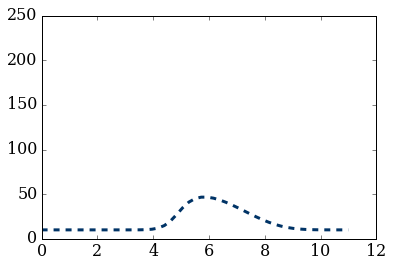

In [122]:
backwardstep(rho0,50)
pyplot.plot(x,rho0, color='#003366', ls='--', lw=3)
pyplot.ylim(0,250); 

Solve Average Vel note converstion from Km/Min -> m/s

In [117]:
sum(vel(rho0))/len(vel(rho0))*(1000/60)

20.561131927733161

Reset Rho0 

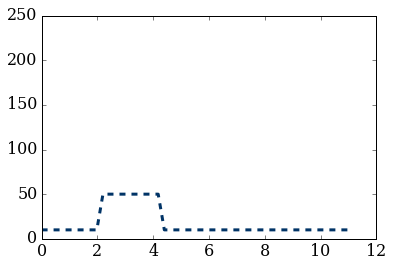

In [125]:
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50
pyplot.plot(x,rho0, color='#003366', ls='--', lw=3)
pyplot.ylim(0,250); 

Run backwardstep for 6 min

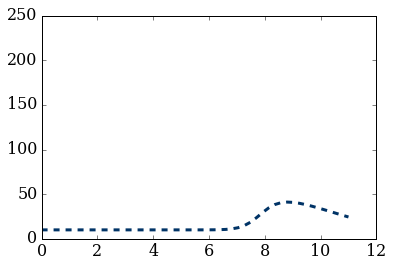

In [126]:
backwardstep(rho0,100)
pyplot.plot(x,rho0, color='#003366', ls='--', lw=3)
pyplot.ylim(0,250); 

solve for min vel at t = 6 min note converstion from Km/Min -> m/s

In [129]:
min(vel(rho0))*1000/60

18.566128191461129